# Business Understanding

This is the data from company to predict nominal zakat. So, we collect the history of the nominal zakat from every person


# Data Understanding

The data we collect from company directly include age, gender, nominal, and periode_transaksi.
- age -> age of person
- gender -> the gender of person
- nominal -> nominal zakat of person
- periode_transaksi -> transaction period of person


## Import Library, Read Data, and show data.


### Import Library

First, lets import the library include numpy, pandas, matplotlib, seaborn, and scikit-learn.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.cluster import KMeans

### Read and show the data

Lets read and show the data with pandas

In [2]:
df = pd.read_csv("./data untuk skripsi.csv")
df.head()

,tanggal_transaksi,umur,gender,occupation,occupation_group,npwz,name,nominal,periode_transaksi
0,2022-12-13,32,pria,Pelaksana,Lainnya,317110010043766,VINDY JALA PRASETYA,300000,Reguler
1,2022-12-13,33,wanita,NIA. 16100127,Amil,317110010050866,Hafiza Elvira Nofitariani,50000,Reguler
2,2022-12-14,48,wanita,Sekretariat Badan PPSDM Kes,PNS,317110010101319,"NUR AZIZAH, A.Md",212500,Reguler
3,2022-12-14,37,wanita,Pegawai Negeri Sipil (PNS),PNS,317110010006748,ESHA NAJITAMA,1000000,Reguler
4,2022-12-14,48,wanita,Sekretariat Badan PPSDM Kes,PNS,317110010101319,"NUR AZIZAH, A.Md",212500,Reguler


# Data Preparation

We have read and show the data and there is some problem with the data. So, the next step we will cleaning and do Exploratory Data Analysis (EDA) for this data.

## Cleaning Data

Lets clean it first

In [3]:
df.head(5)

,tanggal_transaksi,umur,gender,occupation,occupation_group,npwz,name,nominal,periode_transaksi
0,2022-12-13,32,pria,Pelaksana,Lainnya,317110010043766,VINDY JALA PRASETYA,300000,Reguler
1,2022-12-13,33,wanita,NIA. 16100127,Amil,317110010050866,Hafiza Elvira Nofitariani,50000,Reguler
2,2022-12-14,48,wanita,Sekretariat Badan PPSDM Kes,PNS,317110010101319,"NUR AZIZAH, A.Md",212500,Reguler
3,2022-12-14,37,wanita,Pegawai Negeri Sipil (PNS),PNS,317110010006748,ESHA NAJITAMA,1000000,Reguler
4,2022-12-14,48,wanita,Sekretariat Badan PPSDM Kes,PNS,317110010101319,"NUR AZIZAH, A.Md",212500,Reguler


In [4]:
df.isnull().sum()

tanggal_transaksi    0
umur                 0
gender               0
occupation           0
occupation_group     0
npwz                 0
name                 0
nominal              0
periode_transaksi    0
dtype: int64

In [5]:
#Data Cleaning

kolom_yang_dihapus = ['tanggal_transaksi','occupation', 'npwz', 'name', ]
df = df.drop(columns=kolom_yang_dihapus)

In [6]:
# Mengganti kategori 'unidentified' dan 'pensiunan' menjadi 'Lainnya'
df['occupation_group'] = df['occupation_group'].replace(['Unidentified', 'Pensiunan'], 'Lainnya')

In [7]:
# Menampilkan data setelah penghapusan kolom
print("\nData setelah penghapusan kolom:")
print(df)


Data setelah penghapusan kolom:
      umur  gender occupation_group  nominal periode_transaksi
0       32    pria          Lainnya   300000           Reguler
1       33  wanita             Amil    50000           Reguler
2       48  wanita              PNS   212500           Reguler
3       37  wanita              PNS  1000000           Reguler
4       48  wanita              PNS   212500           Reguler
...    ...     ...              ...      ...               ...
7897    51    pria          Lainnya   358210            Kurban
7898    51    pria          Lainnya  2500000            Kurban
7899    51    pria          Lainnya    35700            Kurban
7900    51    pria          Lainnya    32800            Kurban
7901    51    pria          Lainnya    30750           Reguler

[7902 rows x 5 columns]


In [8]:
# Menyimpan data yang sudah dihapus kolomnya ke dalam file CSV baru
df.to_csv("data baru fix.csv", index=False)

In [9]:
df.duplicated().sum()

3738

In [10]:
df.shape

(7902, 5)

In [11]:
df

,umur,gender,occupation_group,nominal,periode_transaksi
0,32,pria,Lainnya,300000,Reguler
1,33,wanita,Amil,50000,Reguler
2,48,wanita,PNS,212500,Reguler
3,37,wanita,PNS,1000000,Reguler
4,48,wanita,PNS,212500,Reguler
...,...,...,...,...,...
7897,51,pria,Lainnya,358210,Kurban
7898,51,pria,Lainnya,2500000,Kurban
7899,51,pria,Lainnya,35700,Kurban
7900,51,pria,Lainnya,32800,Kurban


# Data Transformation

In [12]:
from sklearn.preprocessing import OneHotEncoder
df = pd.read_csv('data baru fix.csv') 
print(df)

      umur  gender occupation_group  nominal periode_transaksi
0       32    pria          Lainnya   300000           Reguler
1       33  wanita             Amil    50000           Reguler
2       48  wanita              PNS   212500           Reguler
3       37  wanita              PNS  1000000           Reguler
4       48  wanita              PNS   212500           Reguler
...    ...     ...              ...      ...               ...
7897    51    pria          Lainnya   358210            Kurban
7898    51    pria          Lainnya  2500000            Kurban
7899    51    pria          Lainnya    35700            Kurban
7900    51    pria          Lainnya    32800            Kurban
7901    51    pria          Lainnya    30750           Reguler

[7902 rows x 5 columns]


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7902 entries, 0 to 7901
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   umur               7902 non-null   int64 
 1   gender             7902 non-null   object
 2   occupation_group   7902 non-null   object
 3   nominal            7902 non-null   int64 
 4   periode_transaksi  7902 non-null   object
dtypes: int64(2), object(3)
memory usage: 308.8+ KB


In [14]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
encoder = LabelEncoder()

# Mengkodekan kolom 'Gender'
df['gender'] = encoder.fit_transform(df['gender'])

# Mengkodekan kolom 'Periode Transaksi'
df['periode_transaksi'] = encoder.fit_transform(df['periode_transaksi'])

# Menampilkan DataFrame dengan kolom yang telah diencode
print(df)

      umur  gender occupation_group  nominal  periode_transaksi
0       32       0          Lainnya   300000                  2
1       33       1             Amil    50000                  2
2       48       1              PNS   212500                  2
3       37       1              PNS  1000000                  2
4       48       1              PNS   212500                  2
...    ...     ...              ...      ...                ...
7897    51       0          Lainnya   358210                  0
7898    51       0          Lainnya  2500000                  0
7899    51       0          Lainnya    35700                  0
7900    51       0          Lainnya    32800                  0
7901    51       0          Lainnya    30750                  2

[7902 rows x 5 columns]


## Exploratory Data Analysis (EDA)

Lets do Exploratory Data Analysis about this

### Univariate Analysis

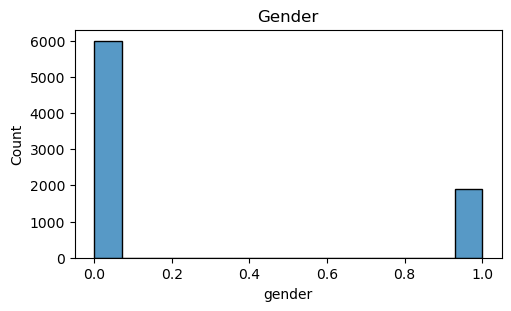

gender
0    6000
1    1902
Name: count, dtype: int64


In [15]:
# Univariate for categorical variables of gender

fig, ax = plt.subplots(figsize=(5, 3), layout="constrained")
sns.histplot(data=df["gender"], ax=ax)
ax.set_title("Gender")
plt.show()
print(df["gender"].value_counts())

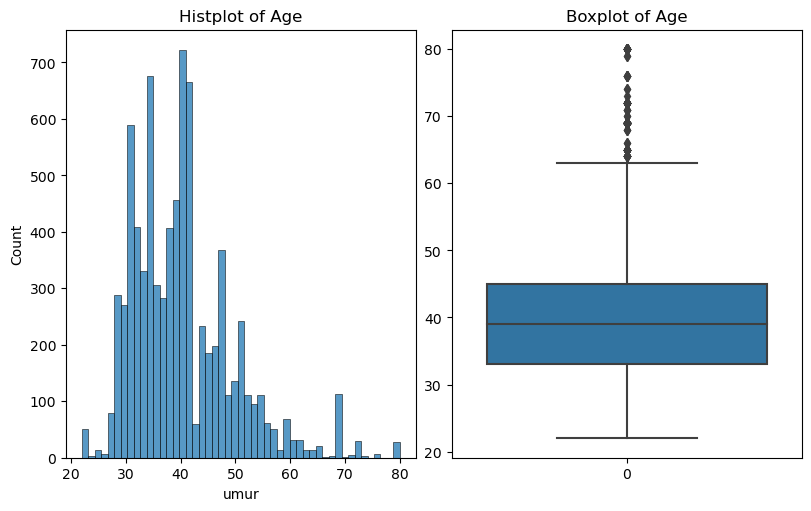

count    7902.000000
mean       40.210073
std         9.204117
min        22.000000
25%        33.000000
50%        39.000000
75%        45.000000
max        80.000000
Name: umur, dtype: float64


In [16]:
# Univariate Analysis of Numerical variables of Umur
fig, ax = plt.subplots(1, 2, figsize=(8, 5), layout="constrained")
sns.histplot(data=df["umur"], ax=ax[0])
sns.boxplot(data=df["umur"], ax=ax[1])
ax[0].set_title("Histplot of Age")
ax[1].set_title("Boxplot of Age")
plt.show()
print(df["umur"].describe())

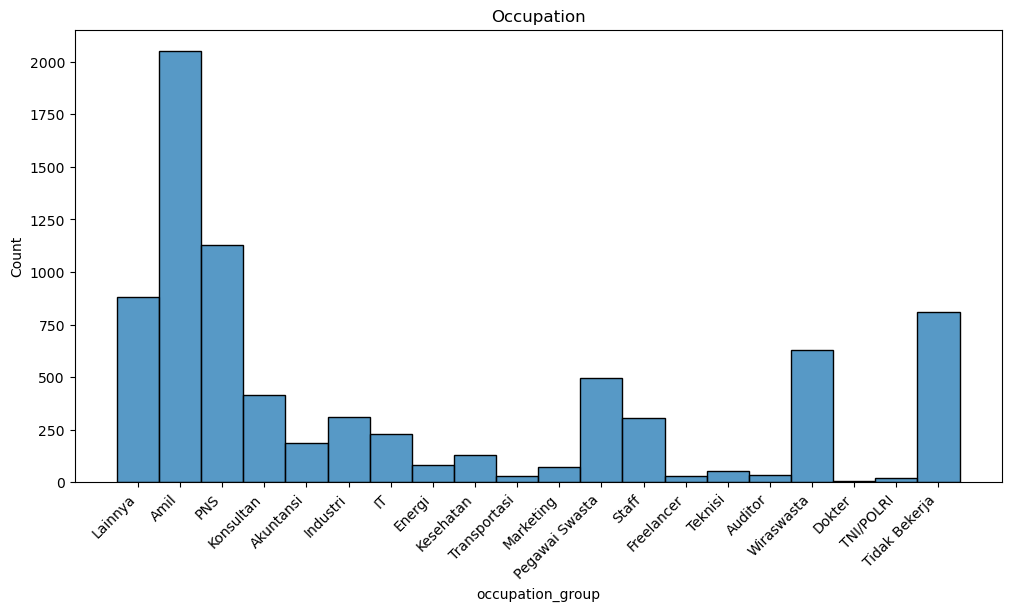

occupation_group
Amil              2050
PNS               1129
Lainnya            880
Tidak Bekerja      809
Wiraswasta         631
Pegawai Swasta     496
Konsultan          416
Industri           311
Staff              305
IT                 231
Akuntansi          187
Kesehatan          129
Energi              81
Marketing           71
Teknisi             55
Auditor             37
Freelancer          29
Transportasi        28
TNI/POLRI           19
Dokter               8
Name: count, dtype: int64


In [17]:
# Univariate Analysis for categorical variables of occupation
fig, ax = plt.subplots(figsize=(10, 6), layout="constrained")
sns.histplot(data=df["occupation_group"], ax=ax)
ax.set_title("Occupation")
plt.xticks(rotation=45, ha='right')
plt.show()
print(df["occupation_group"].value_counts())

occupation_group
Amil              2050
PNS               1129
Lainnya            880
Tidak Bekerja      809
Wiraswasta         631
Pegawai Swasta     496
Konsultan          416
Industri           311
Staff              305
IT                 231
Akuntansi          187
Kesehatan          129
Energi              81
Marketing           71
Teknisi             55
Auditor             37
Freelancer          29
Transportasi        28
TNI/POLRI           19
Dokter               8
Name: count, dtype: int64


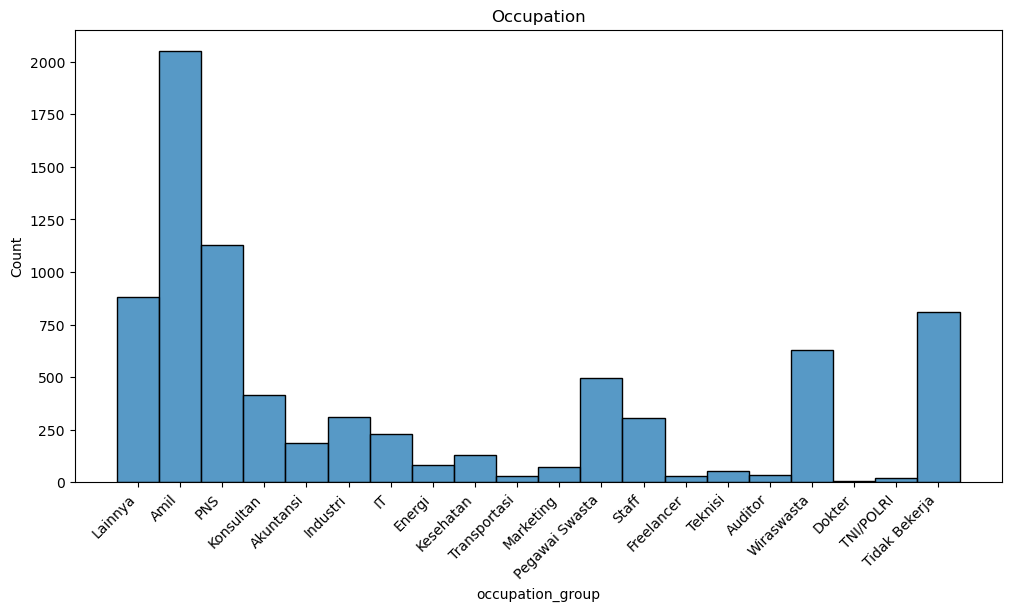

In [18]:
# Univariate Analysis for categorical variables of occupation
fig, ax = plt.subplots(figsize=(10, 6), layout="constrained")
sns.histplot(data=df["occupation_group"], ax=ax)
ax.set_title("Occupation")
print(df["occupation_group"].value_counts())
plt.xticks(rotation=45, ha='right')
plt.show()

In [19]:
df.describe(exclude="number")

,occupation_group
count,7902
unique,20
top,Amil
freq,2050


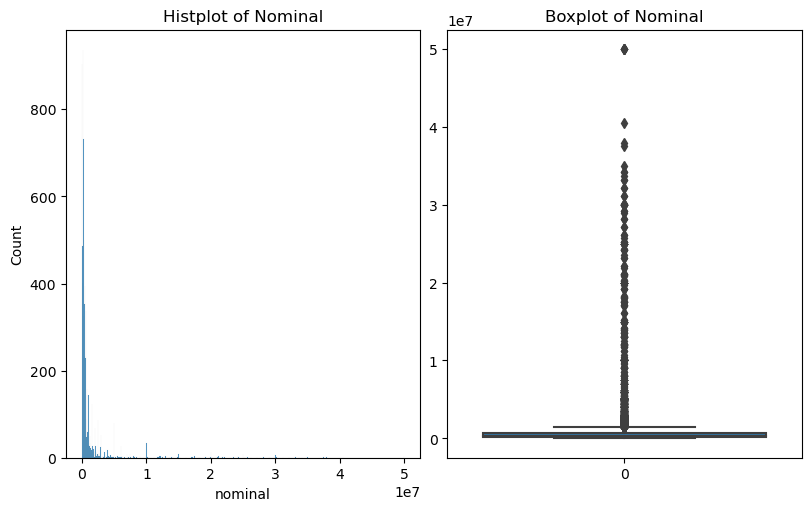

count    7.902000e+03
mean     1.086631e+06
std      3.274786e+06
min      1.000000e+04
25%      1.753050e+05
50%      3.150000e+05
75%      6.849075e+05
max      5.000000e+07
Name: nominal, dtype: float64


In [20]:
# Univariate Analysis of Numerical variables Umur
fig, ax = plt.subplots(1, 2, figsize=(8, 5), layout="constrained")
sns.histplot(data=df["nominal"], ax=ax[0])
sns.boxplot(data=df["nominal"], ax=ax[1])
ax[0].set_title("Histplot of Nominal")
ax[1].set_title("Boxplot of Nominal")
plt.show()
print(df["nominal"].describe())

In [21]:
maxx1 = df[df["nominal"] == df["nominal"].max()].index
df.drop(maxx1, axis=0, inplace=True)

maxx2 = df[df["nominal"] == df["nominal"].max()].index
df.drop(maxx2, axis=0, inplace=True)

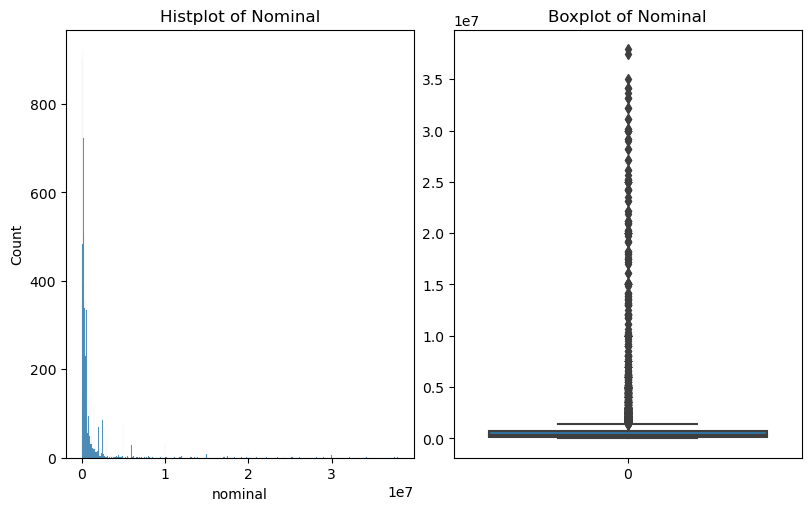

count    7.896000e+03
mean     1.050666e+06
std      3.003184e+06
min      1.000000e+04
25%      1.753050e+05
50%      3.150000e+05
75%      6.783750e+05
max      3.793694e+07
Name: nominal, dtype: float64


In [22]:
fig, ax = plt.subplots(1, 2, figsize=(8, 5), layout="constrained")
sns.histplot(data=df["nominal"], ax=ax[0])
sns.boxplot(data=df["nominal"], ax=ax[1])
ax[0].set_title("Histplot of Nominal")
ax[1].set_title("Boxplot of Nominal")
plt.show()
print(df["nominal"].describe())

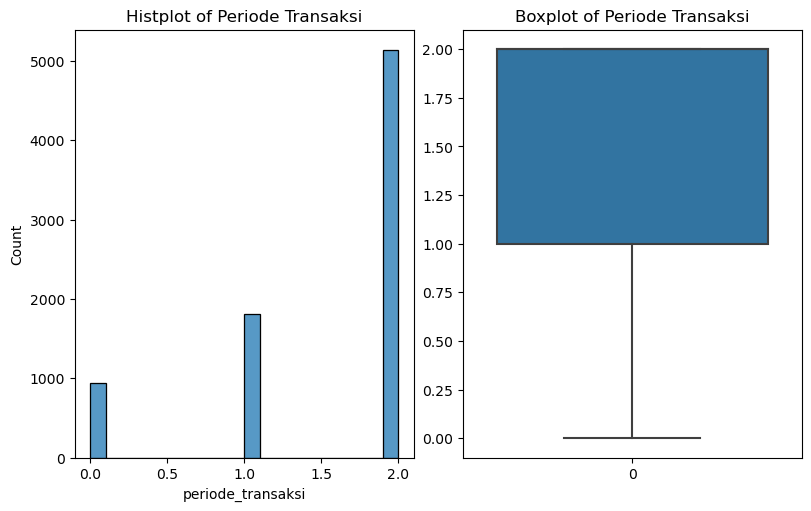

count    7896.000000
mean        1.531408
std         0.698339
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: periode_transaksi, dtype: float64


In [23]:
# Univariate Analysis of Numerical variables periode_transaksi
fig, ax = plt.subplots(1, 2, figsize=(8, 5), layout="constrained")
sns.histplot(data=df["periode_transaksi"], ax=ax[0])
sns.boxplot(data=df["periode_transaksi"], ax=ax[1])
ax[0].set_title("Histplot of Periode Transaksi")
ax[1].set_title("Boxplot of Periode Transaksi")
plt.show()
print(df["periode_transaksi"].describe())

## Bivariate Analysis


In [24]:
df.head()

,umur,gender,occupation_group,nominal,periode_transaksi
0,32,0,Lainnya,300000,2
1,33,1,Amil,50000,2
2,48,1,PNS,212500,2
3,37,1,PNS,1000000,2
4,48,1,PNS,212500,2


Text(0.5, 1.0, 'Gender vs Umur')

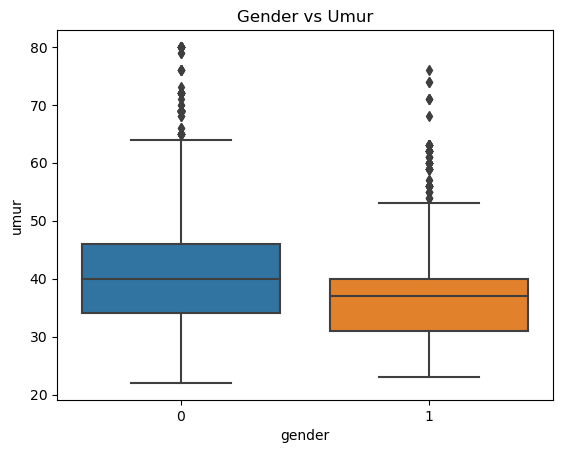

In [25]:
# Bivariate Analysis of gender vs umur
sns.boxplot(data=df, x="gender", y="umur")
plt.title("Gender vs Umur")

Text(0.5, 1.0, 'Periode Transaksi vs Nominal')

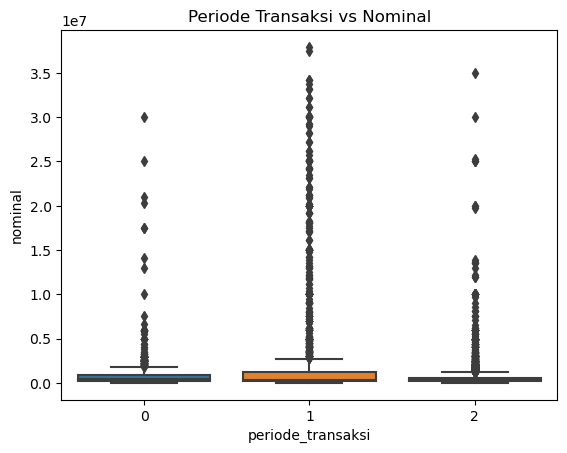

In [26]:
# Bivariate Analysis of periode_transaksi vs nominal
sns.boxplot(data=df, x="periode_transaksi", y="nominal")
plt.title("Periode Transaksi vs Nominal")

Text(0.5, 1.0, 'Periode Transaksi vs Umur')

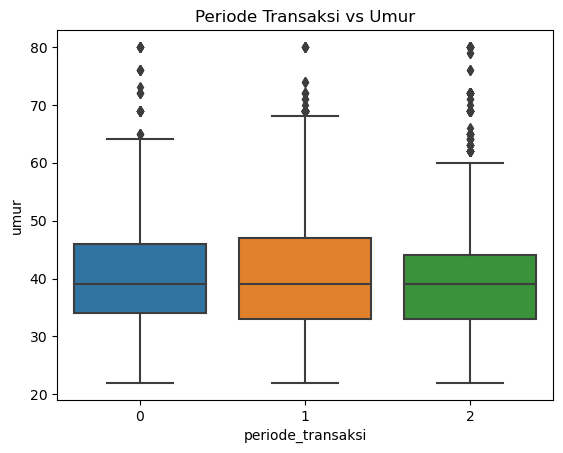

In [27]:
# Bivariate Analysis of periode_transaksi vs umur
sns.boxplot(data=df, x="periode_transaksi", y="umur")
plt.title("Periode Transaksi vs Umur")

Text(0.5, 1.0, 'Periode Gender vs Nominal')

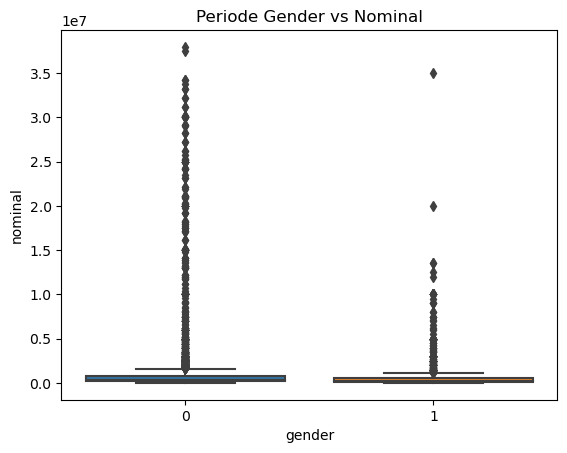

In [28]:
# Bivariate Analysis of gender vs nominal
sns.boxplot(data=df, x="gender", y="nominal")
plt.title("Periode Gender vs Nominal")

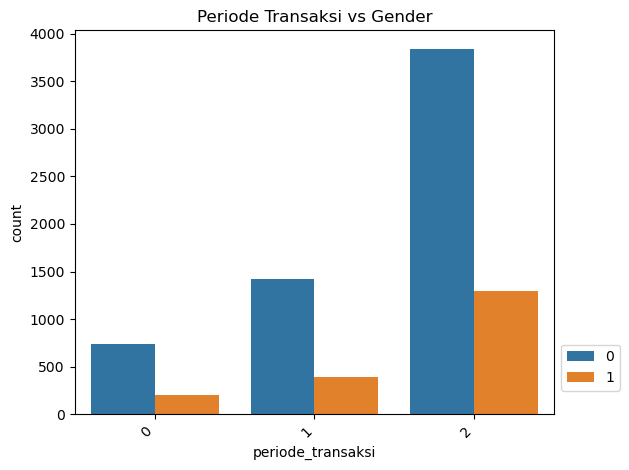

In [29]:
# Bivariate Analysis of Categorical Variables Gender vs Periode Transaksi
ax = sns.countplot(data=df, x="periode_transaksi", hue="gender")
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment="right")
plt.legend(bbox_to_anchor=(1, 0.2))
plt.title("Periode Transaksi vs Gender")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Umur vs Nominal')

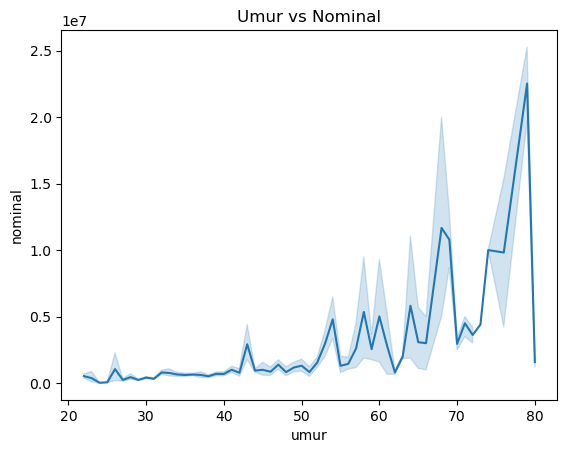

In [30]:
# Bivariate Analysis of umur vs nominal
sns.lineplot(data=df, x="umur", y="nominal")
plt.title("Umur vs Nominal")

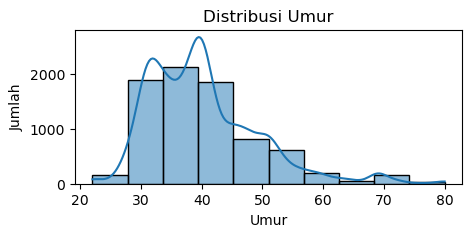

In [31]:
# Visualisasi distribusi umur
plt.figure(figsize=(5, 2))
sns.histplot(df['umur'], bins=10, kde=True)
plt.title('Distribusi Umur')
plt.xlabel('Umur')
plt.ylabel('Jumlah')
plt.show()

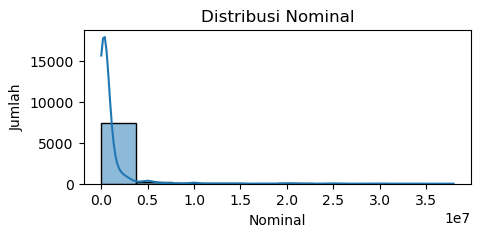

In [32]:
# Visualisasi distribusi umur
plt.figure(figsize=(5, 2))
sns.histplot(df['nominal'], bins=10, kde=True)
plt.title('Distribusi Nominal')
plt.xlabel('Nominal')
plt.ylabel('Jumlah')
plt.show()

# Modeling

## Clustering

Lets cluster it first for get categorical variables

In [33]:
df_cluster = df.copy()
df_cluster.head()

,umur,gender,occupation_group,nominal,periode_transaksi
0,32,0,Lainnya,300000,2
1,33,1,Amil,50000,2
2,48,1,PNS,212500,2
3,37,1,PNS,1000000,2
4,48,1,PNS,212500,2


In [34]:
df_cluster.shape

(7896, 5)

In [35]:
scaler = RobustScaler().fit(df_cluster["nominal"].to_numpy().reshape(-1, 1))
nominal = scaler.transform(df_cluster["nominal"].to_numpy().reshape(-1, 1))
df_cluster = pd.DataFrame(nominal.ravel(), columns=["nominal"])
df_cluster

,nominal
0,-0.029817
1,-0.526766
2,-0.203749
3,1.361640
4,-0.203749
...,...
7891,0.085893
7892,4.343332
7893,-0.555191
7894,-0.560956


C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

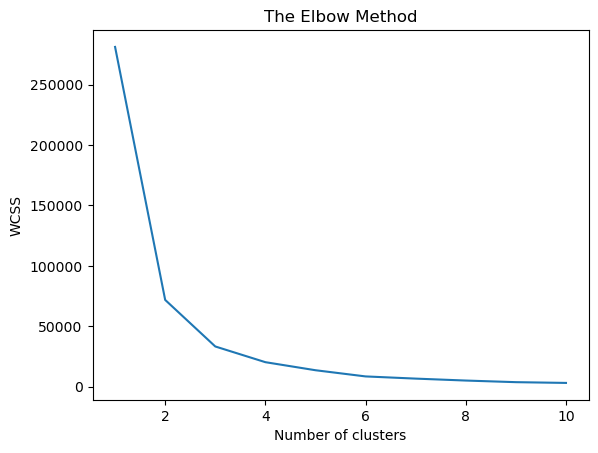

In [36]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_cluster)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [37]:
from sklearn.metrics import silhouette_score

# Instantiate the KMeans for 4 clusters
km = KMeans(n_clusters=4, random_state=42)
# Fit the KMeans model
km.fit(df_cluster)
# Calculate Silhoutte Score
score = silhouette_score(df_cluster, km.labels_, metric='euclidean')
# Print the score
print('Silhouetter Average Score: %.3f' % score)

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouetter Average Score: 0.834


In [38]:
y = km.predict(df_cluster)
df_cluster["result"] = y

df_cluster["nominal"] = scaler.inverse_transform(nominal).ravel()
df_cluster.head()

,nominal,result
0,300000.0,0
1,50000.0,0
2,212500.0,0
3,1000000.0,0
4,212500.0,0


In [39]:
df["result"] = y
df.head()

,umur,gender,occupation_group,nominal,periode_transaksi,result
0,32,0,Lainnya,300000,2,0
1,33,1,Amil,50000,2,0
2,48,1,PNS,212500,2,0
3,37,1,PNS,1000000,2,0
4,48,1,PNS,212500,2,0


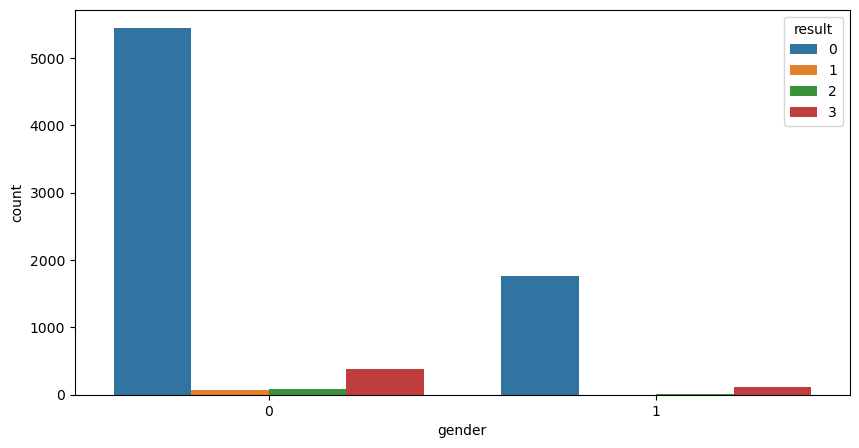

In [40]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.countplot(data=df, x="gender", hue="result")
plt.show()

<Axes: xlabel='result', ylabel='umur'>

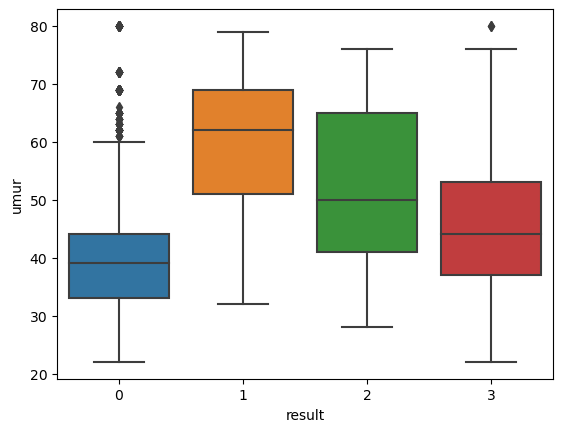

In [41]:
sns.boxplot(data=df, x="result", y="umur")

<Axes: xlabel='result', ylabel='nominal'>

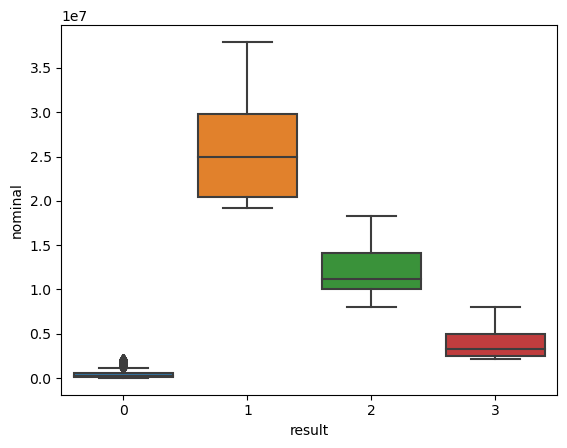

In [42]:
sns.boxplot(data=df, x="result", y="nominal")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


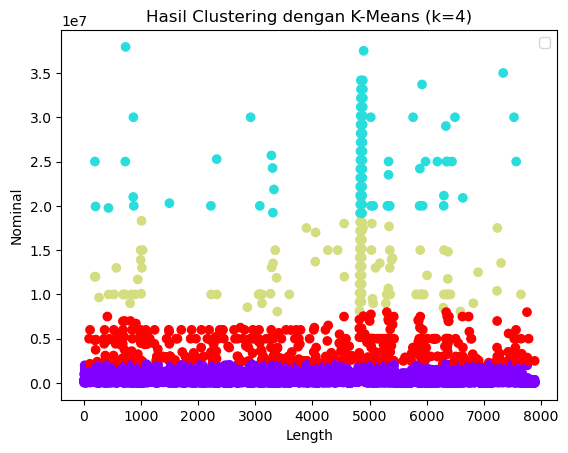

In [43]:
# Lihat data nominal
# Plot hasil clustering
plt.scatter(range(len(df)), df["nominal"], c=df['result'], cmap='rainbow')
plt.xlabel('Length')
plt.ylabel('Nominal')
plt.title('Hasil Clustering dengan K-Means (k=4)')
plt.legend()
plt.show()


In [44]:
df["result"].value_counts()

result
0    7213
3     498
2     107
1      78
Name: count, dtype: int64

In [45]:
result = {0: "Nominal rendah", 3: "Nominal sedang", 2: "Nominal diatas rata-rata", 1: "Nominal tinggi"}

resultt = [result[i] for i in df["result"]]
df["kategori_nominal"] = resultt
df.drop("result", axis=1, inplace=True)
df.head()

,umur,gender,occupation_group,nominal,periode_transaksi,kategori_nominal
0,32,0,Lainnya,300000,2,Nominal rendah
1,33,1,Amil,50000,2,Nominal rendah
2,48,1,PNS,212500,2,Nominal rendah
3,37,1,PNS,1000000,2,Nominal rendah
4,48,1,PNS,212500,2,Nominal rendah


In [46]:
df["kategori_nominal"].value_counts()

kategori_nominal
Nominal rendah              7213
Nominal sedang               498
Nominal diatas rata-rata     107
Nominal tinggi                78
Name: count, dtype: int64

In [47]:
df[df["kategori_nominal"] == "Nominal rendah"]["nominal"].describe()

count    7.213000e+03
mean     4.276587e+05
std      4.205310e+05
min      1.000000e+04
25%      1.673810e+05
50%      2.808330e+05
75%      5.500000e+05
max      2.146100e+06
Name: nominal, dtype: float64

In [48]:
df[df["kategori_nominal"] == "Nominal diatas rata-rata"]["nominal"].describe()

count    1.070000e+02
mean     1.213595e+07
std      2.855568e+06
min      8.058000e+06
25%      1.000000e+07
50%      1.116516e+07
75%      1.416516e+07
max      1.830600e+07
Name: nominal, dtype: float64

In [49]:
df[df["kategori_nominal"] == "Nominal sedang"]["nominal"].describe()

count    4.980000e+02
mean     3.882191e+06
std      1.456716e+06
min      2.175089e+06
25%      2.502092e+06
50%      3.300000e+06
75%      5.000000e+06
max      8.000000e+06
Name: nominal, dtype: float64

In [50]:
df[df["kategori_nominal"] == "Nominal tinggi"]["nominal"].describe()

count    7.800000e+01
mean     2.537790e+07
std      4.979220e+06
min      1.916516e+07
25%      2.045000e+07
50%      2.500000e+07
75%      2.979129e+07
max      3.793694e+07
Name: nominal, dtype: float64

In [51]:
df.to_csv("data_baru2_fix.csv")

In [52]:
# Mengambil 10 sampel acak dari data menggunakan metode random sampling
n = 10
random_sample = df.sample(n)
print(random_sample)

      umur  gender occupation_group  nominal  periode_transaksi  \
1679    39       0             Amil   825000                  2   
6856    38       0   Pegawai Swasta   305944                  2   
2627    42       0             Amil   253458                  2   
7056    29       0   Pegawai Swasta   330283                  2   
521     34       0         Industri   365000                  2   
7407    35       0              PNS   220000                  2   
131     47       0             Amil   319074                  2   
272     32       1            Staff  1050000                  2   
725     31       0              PNS   215000                  1   
6457    42       0    Tidak Bekerja    25000                  2   

     kategori_nominal  
1679   Nominal rendah  
6856   Nominal rendah  
2627   Nominal rendah  
7056   Nominal rendah  
521    Nominal rendah  
7407   Nominal rendah  
131    Nominal rendah  
272    Nominal rendah  
725    Nominal rendah  
6457   Nominal rendah 

In [53]:
columns = {}
for i in df.columns:
    if df[i].dtype == "object" or df[i].dtype == "category":
        columns[i] = LabelEncoder().fit(df[i])
        df[i] = columns[i].transform(df[i])


In [54]:
from sklearn.model_selection import train_test_split

# train_df akan berisi data pelatihan
# test_df akan berisi data pengujian
# Pisahkan data menjadi data pelatihan (80%) dan data pengujian (20%)

X = df.drop(['kategori_nominal', "nominal"], axis=1)  # 'nominal' adalah variabel target
y = df['kategori_nominal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# Menampilkan hasil pemisahan
print("Data Pelatihan:")
print(X_train)
print(y_train)

print("\nData Pengujian:")
print(X_test)
print(y_test)

Data Pelatihan:
      umur  gender  occupation_group  periode_transaksi
196     35       0                 7                  2
4486    31       0                 9                  2
3541    32       0                 1                  2
415     47       0                 4                  2
1767    33       0                 6                  2
...    ...     ...               ...                ...
5231    65       0                19                  2
5396    38       0                19                  2
861     29       1                10                  1
7609    39       0                12                  2
7276    50       1                12                  2

[6316 rows x 4 columns]
196     1
4486    1
3541    2
415     1
1767    1
       ..
5231    1
5396    1
861     1
7609    1
7276    1
Name: kategori_nominal, Length: 6316, dtype: int32

Data Pengujian:
      umur  gender  occupation_group  periode_transaksi
6675    42       0                 6                 


# Pipeline

In [56]:
from sklearn.model_selection import train_test_split

# train_df akan berisi data pelatihan
# test_df akan berisi data pengujian
# Pisahkan data menjadi data pelatihan (80%) dan data pengujian (20%)

X = df.drop(['kategori_nominal', "nominal"], axis=1)  # 'nominal' adalah variabel target
y = df['kategori_nominal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
num_cols = ['umur']

In [58]:
cat_cols = ['gender', 'occupation_group', 'periode_transaksi']

In [59]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [60]:
num_pipeline = Pipeline(steps = [
    ('impute', SimpleImputer(strategy='mean')),
    ('scale', StandardScaler())
])

In [61]:
cat_pipeline = Pipeline(steps = [
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot-encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [62]:
col_transformers = ColumnTransformer(transformers = [
    ('num_pipeline', num_pipeline, num_cols),
    ('cat_pipeline', cat_pipeline, cat_cols),
],
    remainder = 'drop',
    n_jobs = -1
)

In [63]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [64]:
pipefinal = make_pipeline(col_transformers, model)

pipefinal.fit(X_train, y_train)

pipefinal.score(X_test, y_test)

0.9215189873417722

In [65]:
#save the pipeline
import joblib
joblib.dump(pipefinal, "pipe.joblib")

pipefinal2 = joblib.load("pipe.joblib")

## Model C4.5

In [66]:
model_c45 = DecisionTreeClassifier(criterion='entropy')  # Gunakan 'entropy' atau 'gini' sebagai kriteria pemisahan
model_c45.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [67]:
# Fungsi untuk menghitung entropy
def calculate_entropy(data):
    total_samples = len(data)
    value_counts = data.value_counts()
    probabilities = value_counts / total_samples
    entropy = -sum(probabilities * np.log2(probabilities))
    return entropy

# Hitung entropy untuk setiap variabel kategorikal
columns_to_analyze = ['umur', 'gender', 'occupation_group', 'periode_transaksi', 'kategori_nominal']

for column in columns_to_analyze:
    entropy = calculate_entropy(df[column])
    print(f"Entropy for {column}: {entropy}")

Entropy for umur: 4.90513981626614
Entropy for gender: 0.7960833381430548
Entropy for occupation_group: 3.4041416302684167
Entropy for periode_transaksi: 1.2569797128181075
Entropy for kategori_nominal: 0.5205821873218632


In [68]:
y_pred = model_c45.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
conf_matrix = confusion_matrix(y_test, y_pred)

print("Akurasi:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print(conf_matrix)

Akurasi: 0.9164556962025316
Precision: 0.9004605106858359
Recall: 0.9164556962025316
Confusion Matrix:
[[   4    7    3    4]
 [   3 1413   34    0]
 [   2   69   22    3]
 [   2    5    0    9]]


In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.36      0.22      0.28        18
           1       0.95      0.97      0.96      1450
           2       0.37      0.23      0.28        96
           3       0.56      0.56      0.56        16

    accuracy                           0.92      1580
   macro avg       0.56      0.50      0.52      1580
weighted avg       0.90      0.92      0.91      1580



In [70]:
df.shape

(7896, 6)

In [71]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Buat model Decision Tree
model = DecisionTreeClassifier()

# Data X dan label y telah diinisialisasi sebelumnya

# Lakukan 10-Fold Cross-Validation
scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')

# Tampilkan hasil cross-validation
print("Hasil Cross-Validation:")
print("Rata-rata Akurasi: ", np.mean(scores))
print("Standar Deviasi Akurasi: ", np.std(scores))

Hasil Cross-Validation:
Rata-rata Akurasi:  0.8359479231842902
Standar Deviasi Akurasi:  0.10405348913483786


In [72]:
from sklearn.model_selection import GridSearchCV

# Inisialisasi model Decision Tree
decision_tree = DecisionTreeClassifier()

# Daftar hyperparameter yang akan diuji
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi Grid Search dengan model, parameter grid, dan metrik evaluasi
grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy')

# Melakukan pencarian hyperparameter terbaik
grid_search.fit(X_train, y_train)
# Menampilkan hyperparameter terbaik
print("Hyperparameter terbaik:", grid_search.best_params_)

# Evaluasi model terbaik pada data uji
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Akurasi model terbaik:", accuracy)

Hyperparameter terbaik: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Akurasi model terbaik: 0.9234177215189874


In [73]:
model = grid_search.best_estimator_
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
conf_matrix = confusion_matrix(y_test, y_pred)

print("Akurasi:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print(conf_matrix)

Akurasi: 0.9234177215189874
Precision: 0.8993453569339728
Recall: 0.9234177215189874
Confusion Matrix:
[[   1   11    2    4]
 [   0 1432   18    0]
 [   2   74   17    3]
 [   2    5    0    9]]


In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df["umur"].to_numpy().reshape(-1, 1))
X["umur"] = scaler.transform(X["umur"].to_numpy().reshape(-1, 1))
X

,umur,gender,occupation_group,periode_transaksi
0,-0.891390,0,10,2
1,-0.782697,1,1,2
2,0.847698,1,12,2
3,-0.347925,1,12,2
4,0.847698,1,12,2
...,...,...,...,...
7897,1.173777,0,10,0
7898,1.173777,0,10,0
7899,1.173777,0,10,0
7900,1.173777,0,10,0


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_c45 = DecisionTreeClassifier(criterion='entropy')  # Gunakan 'entropy' atau 'gini' sebagai kriteria pemisahan
model_c45.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [76]:
# Hitung entropy untuk setiap variabel kategorikal
columns_to_analyze = ['umur', 'gender', 'periode_transaksi', 'kategori_nominal']

for column in columns_to_analyze:
    entropy = calculate_entropy(df[column])
    print(f"Entropy for {column}: {entropy}")

Entropy for umur: 4.90513981626614
Entropy for gender: 0.7960833381430548
Entropy for periode_transaksi: 1.2569797128181075
Entropy for kategori_nominal: 0.5205821873218632


In [77]:
y_pred = model_c45.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
conf_matrix = confusion_matrix(y_test, y_pred)

print("Akurasi:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print(conf_matrix)

Akurasi: 0.9170886075949367
Precision: 0.9016769242271374
Recall: 0.9170886075949367
Confusion Matrix:
[[   4    7    3    4]
 [   3 1413   34    0]
 [   2   68   23    3]
 [   2    5    0    9]]


<Axes: >

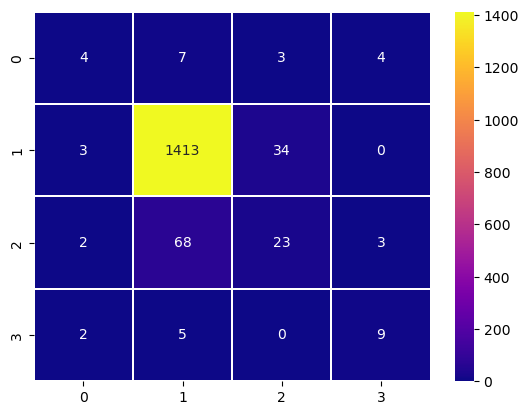

In [78]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="plasma", linewidths=.2, linecolor="white")

In [79]:
model = grid_search.best_estimator_
y_pred = model.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        34
           1       0.84      0.91      0.88      1344
           2       0.08      0.04      0.05       202
           3       0.00      0.00      0.00         0

    accuracy                           0.78      1580
   macro avg       0.23      0.24      0.23      1580
weighted avg       0.73      0.78      0.75      1580



C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [80]:
X["umur"] = scaler.inverse_transform(X["umur"].to_numpy().reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
model_c45.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [82]:
y_pred = model_c45.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.36      0.22      0.28        18
           1       0.95      0.98      0.96      1450
           2       0.38      0.23      0.29        96
           3       0.56      0.56      0.56        16

    accuracy                           0.92      1580
   macro avg       0.56      0.50      0.52      1580
weighted avg       0.90      0.92      0.91      1580



<Axes: >

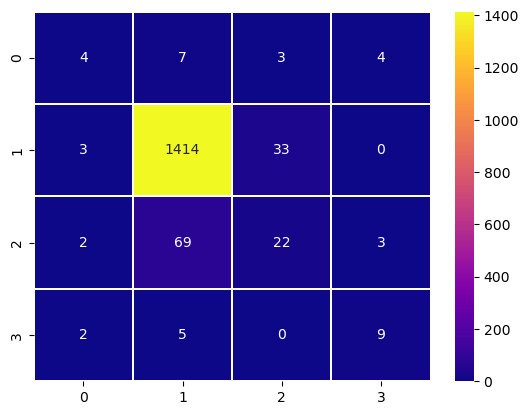

In [83]:
sns.heatmap(data=confusion_matrix(y_test, y_pred), fmt="d", annot=True, cmap="plasma", linewidths=.2, linecolor="white")


In [84]:
import pickle

In [85]:
# Simpan model ke dalam file
with open('model_prediction_fundraising.pkl', 'wb') as file:
    pickle.dump(model_c45, file)
    
# Memuat model dari file    
with open('model_prediction_fundraising.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [86]:
# Menguji model yang telah dimuat pada data uji
y_pred_loaded = loaded_model.predict(X_test)

# Mengukur akurasi model setelah memuatnya kembali
accuracy_loaded = accuracy_score(y_test, y_pred_loaded)
print("Akurasi Model setelah memuat:", accuracy_loaded)

Akurasi Model setelah memuat: 0.9170886075949367
